In [2]:
import pandas as pd
import json
import numpy as np
import os
import sys
sys.path.append('../')
from src import cleaning

In [13]:
"""Data cleaning for DN1
"""

dataloc = '../../data/adc_dn_tracks/'
saveloc_dn1 = '../../data/processed/mosaic_DN1'
saveloc_dn2 = '../../data/processed/mosaic_DN2'

files = os.listdir(dataloc)
files = [f for f in files if f[0] not in ['.', 'S', 'D']]

mosaic_data = {}

## List of V buoys with missing (-) in longitudes after crossing meridian
# Thanks Angela for finding these! Should be updated in the ADC drift set v3.
v_fix_list = {'M2_300234067064490_2019V2.csv': '2020-07-26 17:58:08',
              'M3_300234067064370_2019V3.csv': '2020-07-11 23:58:05',
              'M5_300234067066520_2019V4.csv': '2020-07-10 00:58:09'}

for file in files:
    buoy = file.split('_')[-1].replace('.csv', '')
    df = pd.read_csv(dataloc + file, index_col='datetime', parse_dates=True)

    # Adjust V buoys to UTC from Beijing time
    if 'V' in buoy:
        df.index = df.index - pd.to_timedelta('8H')

    # Apply correction to longitude issue for 3 V buoys
    if file in v_fix_list:
        time = pd.to_datetime(v_fix_list[file])
        df_subset = df[time:]
        df_subset.loc[:, 'longitude'] = df_subset.loc[:, 'longitude']*-1
        df.update(df_subset)
        if 'M5' in file.split('_'):        
            df_subset = df['2020-07-10 07:58:06':'2020-07-10 09:58:28']
            df_subset.longitude = df_subset.longitude*-1
            df.update(df_subset)

    df_qc = cleaning.standard_qc(df,
                        min_size=100,
                        gap_threshold='6H',                
                        segment_length=24,
                        lon_range=(-180, 180),
                        lat_range=(50, 90),
                        max_speed=1.5,
                        speed_window='3D',
                        verbose=False)
    if df_qc is not None:
        mosaic_data[buoy] = df_qc.loc[~df_qc.flag, ['latitude', 'longitude']]

Observations in bounding box 76 less than min size 100


/var/folders/_1/dv6d0pjn20bgy9ysl0pfsbr40000gn/T/ipykernel_32322/1018742556.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.longitude = df_subset.longitude*-1


n_min is nan , setting it to 10.
n_min is nan , setting it to 10.


# Separating DN1 and DN2


In [9]:
metadata = pd.read_csv('../../data/adc_dn_tracks/DN_buoy_list_v2.csv').set_index('Sensor ID')
metadata.loc[metadata['Deployment Leg'] == 5]

,Deployment Leg,DN Station ID,IMEI,Deployment Date,Deployment Datetime,First Data Datetime,Last Data Datetime,Active,Sampling Frequency (hh:mm),Re-deployed As,Formerly Deployed As,Buoy Type,Manufacturer,Model,PI,Data Authors
Sensor ID,,,,,,,,,,,,,,,,
2020M23,5,CO3,300025060609430,2020-09-18,2020-09-18 11:45:00,2020-09-18 12:32:26,2020-10-25 10:04:31,0,01:00,NaN,NaN,IMBFlex,Bruncin,IMBFlex,Hoppmann,Mario Hoppmann
2020R21,5,CO3,300025060613750,2020-08-27,2020-08-27 10:15:00,2020-08-27 11:00:06,2020-11-14 16:00:02,0,01:00,NaN,2020R11,Radiation Station,Bruncin,Radiation Station,Nicolaus,Marcel Nicolaus; Mario Hoppmann; Ran Tao; Chri...
2020T78,5,CO3,300234068529570,2020-08-23,2020-08-23 17:09:00,2020-08-23 17:10:23,2021-02-25 18:30:14,0,00:30,NaN,NaN,Thermistor,SAMS Enterprise Ltd,SIMBA V7,Lei,Ruibo Lei; Bin Cheng; Mario Hoppmann; Marcel N...
2020T81,5,CO3,300234068708320,2020-08-30,2020-08-30 11:30:00,2020-08-30 12:00:13,2021-02-10 22:00:15,0,02:00,NaN,NaN,Thermistor,SAMS Enterprise Ltd,SIMBA V7,Cheng,Bin Cheng; Ruibo Lei; Mario Hoppmann; Marcel N...
ASFS30UCB4,5,CO3,ASFS30UCB,2020-08-21,2020-08-21 16:35:00,2020-08-23 00:00:00,2020-09-04 09:20:00,0,00:10,ASFS30UCB5,ASFS30UCB1; ASFS30UCB2; ASFS30UCB3,Atmospheric Surface Flux Station,Hemisphere,GPS Compass V102,Shupe,Matthew D Shupe; Ola Persson; Christopher J Co...
ASFS30UCB5,5,CO3,ASFS30UCB,2020-09-04,2020-09-04 11:00:00,2020-09-04 11:00:01,2020-09-20 05:40:00,0,00:10,NaN,ASFS30UCB1; ASFS30UCB2; ASFS30UCB3; ASFS30UCB4,Atmospheric Surface Flux Station,Hemisphere,GPS Compass V102,Shupe,Matthew D Shupe; Ola Persson; Christopher J Co...
ASFS50UCB4,5,CO3,ASFS50UCB,2020-08-21,2020-08-21 15:00:00,2020-08-22 23:49:59,2020-09-20 05:00:01,0,00:10,NaN,ASFS50UCB1; ASFS50UCB2; ASFS50UCB3,Atmospheric Surface Flux Station,Hemisphere,GPS Compass V102,Shupe,Matthew D Shupe; Ola Persson; Christopher J Co...
ASFSTUCB3,5,CO3,ASFSTUCB,2020-08-25,2020-08-25 13:10:00,2020-08-27 10:19:59,2020-09-18 04:40:01,0,00:10,NaN,ASFSTUCB1; ASFSTUCB2,Atmospheric Surface Flux Station,Hemisphere,GPS Compass V102,Shupe,Matthew D Shupe; Ola Persson; Christopher J Co...
2020P162,5,P090,300534061800900,2020-09-02,2020-09-02 11:35:00,2020-09-02 12:00:26,2020-11-25 23:01:28,0,00:30,NaN,NaN,SVP,PacificGyre IT,Ice Tracker,Hwang,Byongjun Hwang


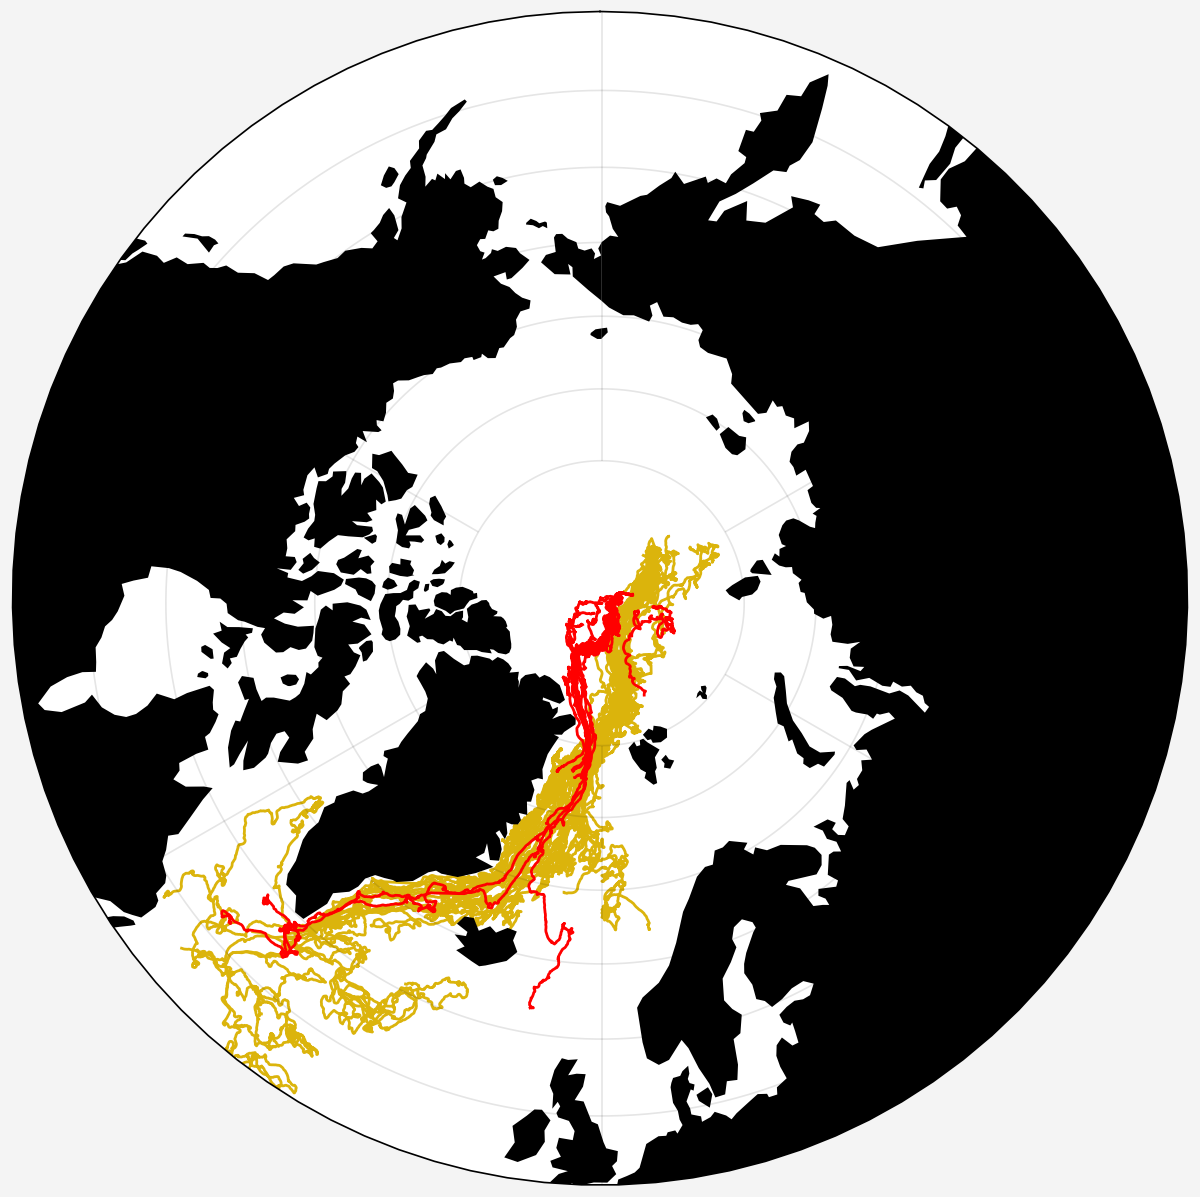

In [15]:
import proplot as pplt
import warnings
warnings.simplefilter('ignore')
fig, ax = pplt.subplots(proj='npstere', width=6)
ax.format(boundinglat=50, land=True)
for buoy in mosaic_data:
    if buoy in metadata.index:
        c = 'gold'
        z = 0
        if metadata.loc[buoy, 'Deployment Leg'] == 5:
            c = 'r'
            z = 10
        if mosaic_data[buoy] is not None:
            df = mosaic_data[buoy]
            ax.plot(mosaic_data[buoy].longitude, mosaic_data[buoy].latitude, lw=1, color=c, zorder=z)

In [16]:
for buoy in mosaic_data:
    if metadata.loc[buoy, 'Deployment Leg'] == 5:
        mosaic_data[buoy].to_csv(saveloc_dn2 + buoy + '.csv')
    else:
        mosaic_data[buoy].to_csv(saveloc_dn1 + buoy + '.csv')

Processing the MOSAiC data

I've done a lot of this already. The question is whether the standard_qc is enough, and if not, what else needs to be added? I was able to avoid some of the issues by going with hourly data and skipping some buoys that were especially tricky. I want to be able to hand Chris some good comparison data. I also want to be able to QC the higher resolution data.

In [115]:
"""Code to produce the interpolated drift tracks used for the analysis. Requires the 
data from the Arctic Data Center to be downloaded and the location of that data to 
be specified as "dataloc".
"""
dataloc = '../../data/adc_dn_tracks/'
saveloc = '../../data/mosaic/'

files = os.listdir(dataloc)
files = [f for f in files if f[0] not in ['.', 'S', 'D']]
files = [f for f in files if 'summary.csv' not in f.split('_')]
## List of V buoys with missing (-) in longitudes after crossing meridian
# Thanks Angela for finding these! Should be updated in the ADC drift set v3.
v_fix_list = {'M2_300234067064490_2019V2.csv': '2020-07-26 17:58:08',
              'M3_300234067064370_2019V3.csv': '2020-07-11 23:58:05',
              'M5_300234067066520_2019V4.csv': '2020-07-10 00:58:09'}
first_pass = {}
for file in files:
    buoy = file.split('_')[-1].replace('.csv', '')
    df = pd.read_csv(dataloc + file, index_col='datetime', parse_dates=True)

    # Adjust V buoys to UTC from Beijing time
    if 'V' in buoy:
        df.index = df.index - pd.to_timedelta('8H')

    # Apply correction to longitude issue for 3 V buoys
    if file in v_fix_list:
        time = pd.to_datetime(v_fix_list[file])
        df_subset = df[time:]
        df_subset.loc[:, 'longitude'] = df_subset.loc[:, 'longitude']*-1
        df.update(df_subset)
        if 'M5' in file.split('_'):        
            df_subset = df['2020-07-10 07:58:06':'2020-07-10 09:58:28']
            df_subset.longitude = df_subset.longitude*-1
            df.update(df_subset)

    df_qc = cleaning.standard_qc(df,
                        min_size=100,
                        gap_threshold='6H',                
                        segment_length=24,
                        lon_range=(-180, 180),
                        lat_range=(65, 90),
                        max_speed=1.5,
                        speed_window='3D',
                        verbose=False)
    if df_qc is not None:
        first_pass[buoy] = df_qc.copy()
    else:
        print('Warning: ', buoy, 'has no passing data')

Observations in bounding box 76 less than min size 100


/var/folders/_1/dv6d0pjn20bgy9ysl0pfsbr40000gn/T/ipykernel_29425/1551871326.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.longitude = df_subset.longitude*-1


n_min is nan , setting it to 10.
Observations in bounding box 4 less than min size 100
n_min is nan , setting it to 10.


In [180]:
verified_correct

[['2019R9',
  array([Timestamp('2020-04-23 11:01:09'), 84.0837, 16.63491, True],
        dtype=object)]]

# Examples of random errors

Error properties depend on the instrument and on the frequency of observations. I've got a short list of example test cases. Could be expanded. 
- Cleaning hourly data is simpler than cleaning 10-minute data, in part since there's 1/6th of the data to check
- Leveraging the nearest neighbor information. Problem of mismatched time indices.
- I've manually selected a few cases for the position/speed checks, and the basic checks miss stuff

# Other filtering steps
- Short segments: some buoys will have a burst of data, but I'm leaving it out if there's not enough to make a daily estimate. Current version is based on hourly data, requiring 24 hours. But that makes a short segment for the high frequency data.
- In sea ice / not in sea ice. For the final cleaned and qc'd dataset, I want to truncate the time series based on whether they are in sea ice
- 

In [126]:
verified_correct = []
buoy = '2019R9'
buoy_df = first_pass['2019R9']
verified_correct.append([buoy] + list(buoy_df.loc[buoy_df.flag].reset_index().values))


verfied_correct.append()

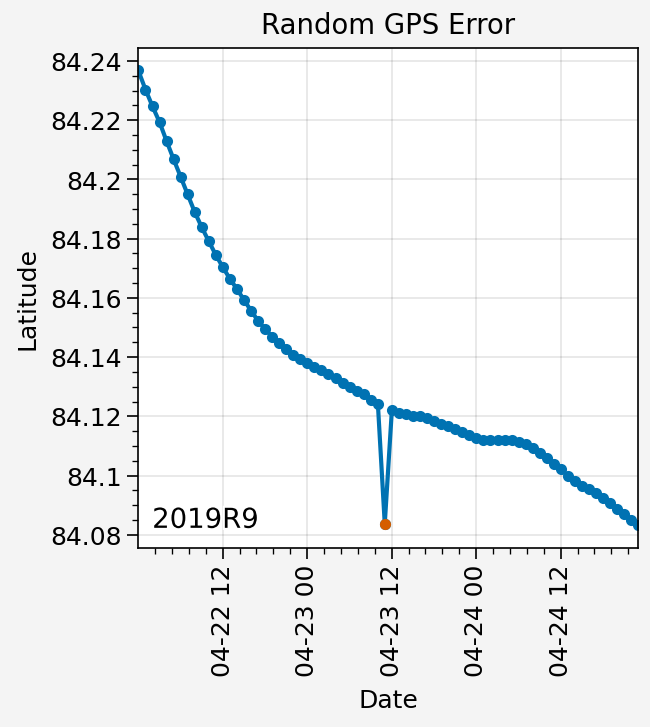

In [118]:
# Example of error
# Re-do in the manuscript subfolder
fig, ax = pplt.subplots()
buoy_df = first_pass['2019R9']
timeslice = slice('2020-04-22', '2020-04-24')
ax.plot(buoy_df.loc[timeslice, 'latitude'], marker='.')
ax.plot(buoy_df.where(buoy_df.flag).loc[timeslice, 'latitude'], marker='.')
ax.format(xlabel='Date', ylabel='Latitude', title='Random GPS Error', lltitle='2019R9')
# fig.save('../sample/random_gps_error.jpg', dpi=72)

In [234]:
test_df = pd.DataFrame([
    ['2019O3', '2019-12-20 17:50:00', True],
    ['2019P140', '2019-10-30 15:30:00', True],
    ['2019P142', '2020-04-04 14:30:00', True],
    ['2019P142', '2020-05-25 01:00:00', True], 
    ['2019P142', '2020-07-23 00:59:59', True],
    ['2019P203', '2020-04-12 17:00:39', True],    
    ['2020P171','2020-12-13 00:04:00', True],
    ['2020P171', '2021-01-08 20:04:01', True],
    ['2020P171', '2021-01-08 16:04:02', True],
    ['2019P206', '2019-10-26 10:31:57', True],    
    ['2019R9', '2020-04-23 11:01:09', True],
    ['2019R9', '2020-05-17 01:02:20', True],
    ['2019S94', '2019-12-21 08:01:00', False],
    ['2019S94', '2020-02-09 08:02:00', True]
    ], columns=['buoy_id', 'date', 'outlier'])

test_df['date'] = pd.to_datetime(test_df.date.values)

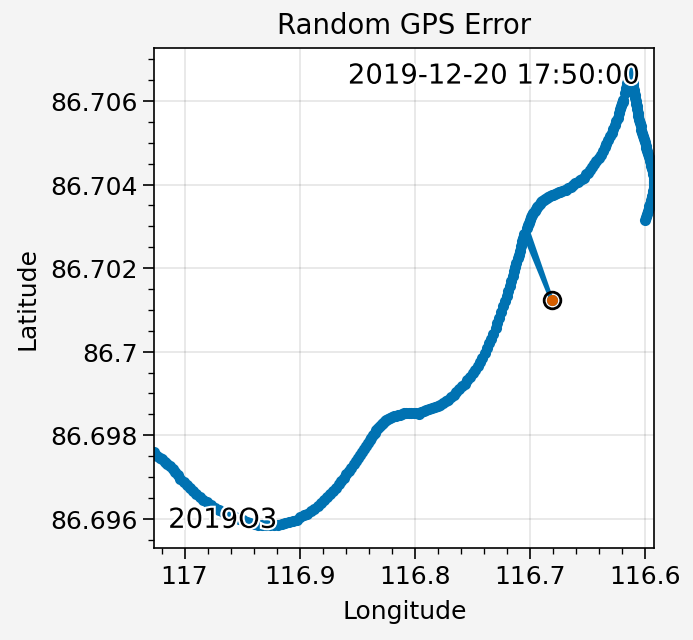

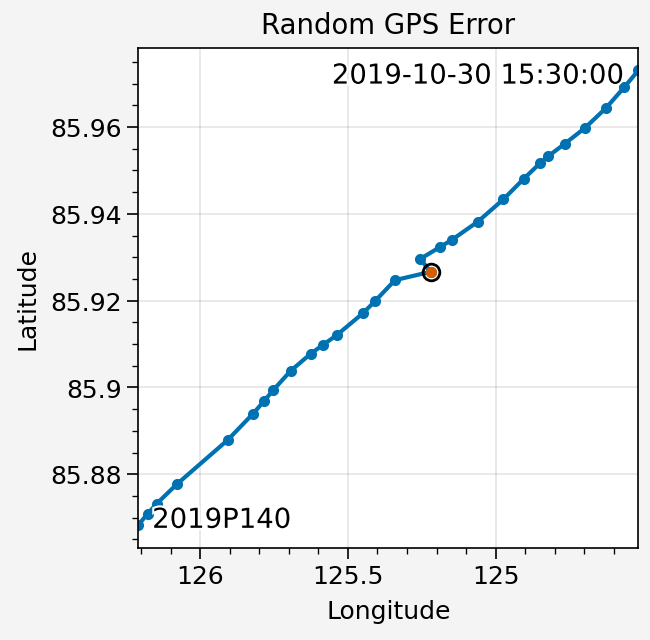

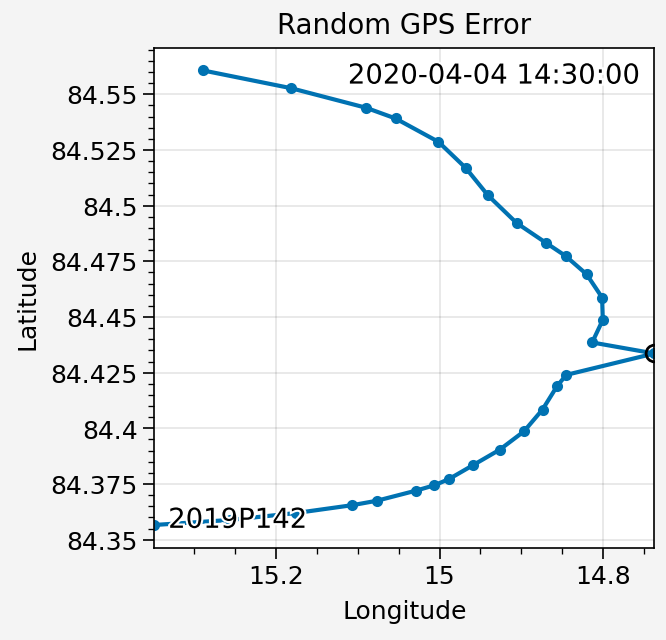

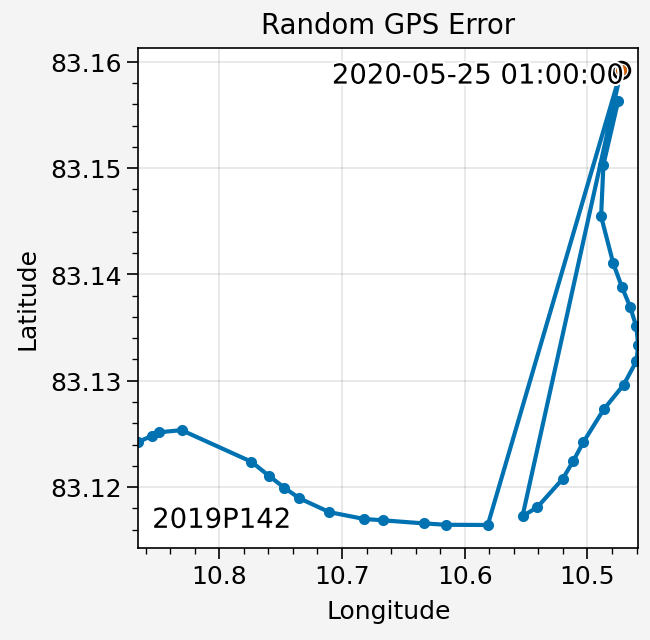

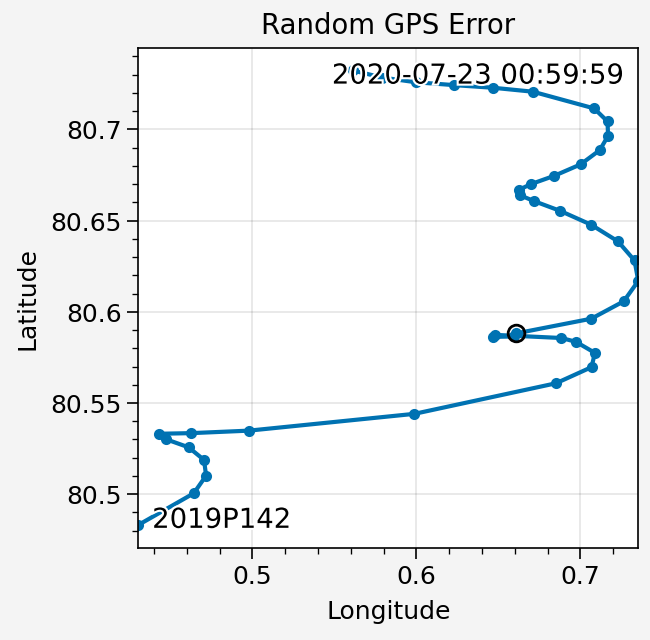

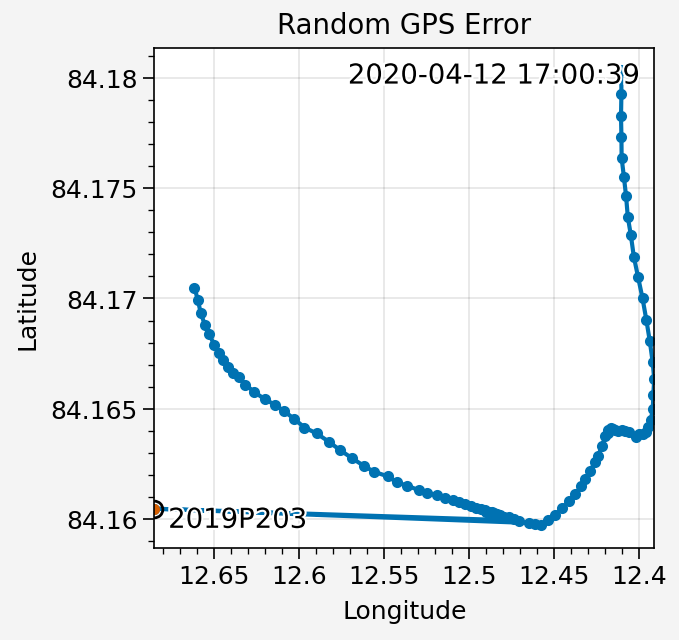

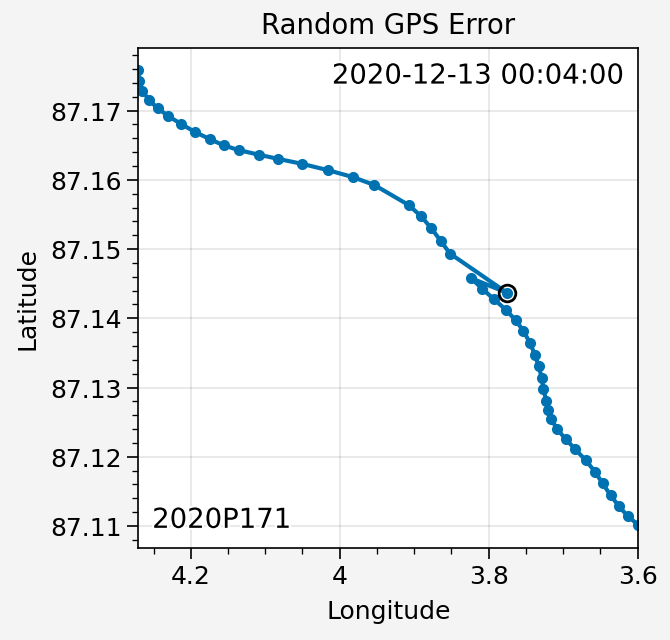

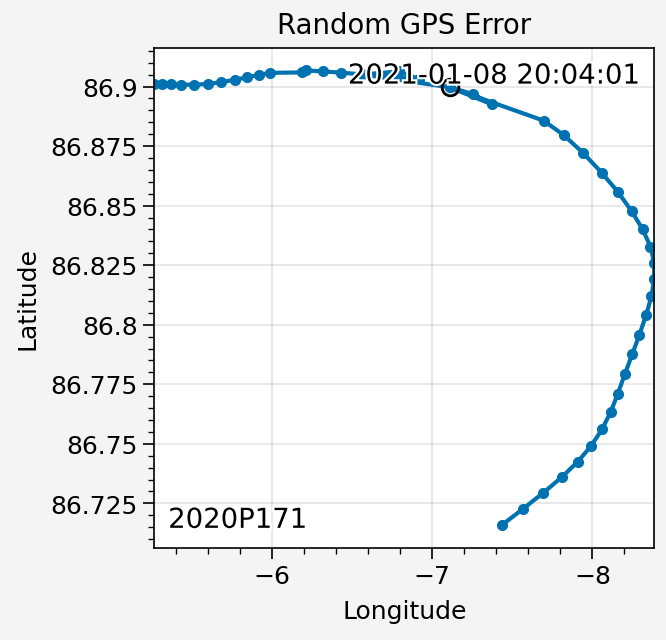

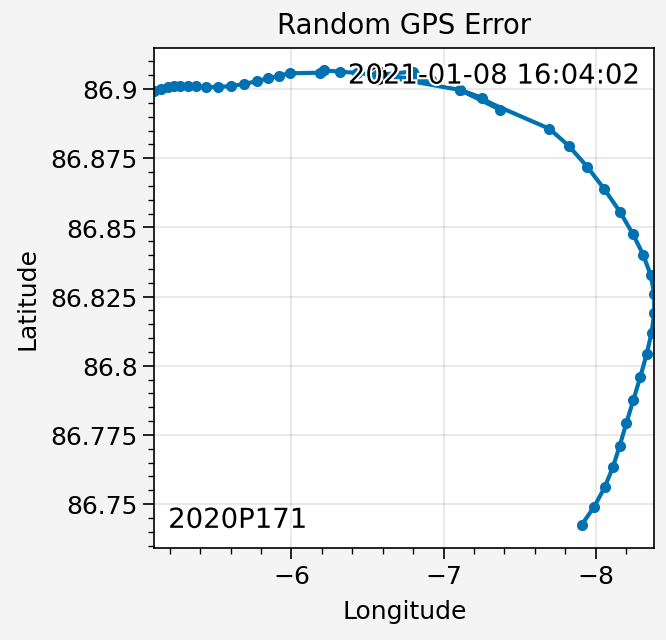

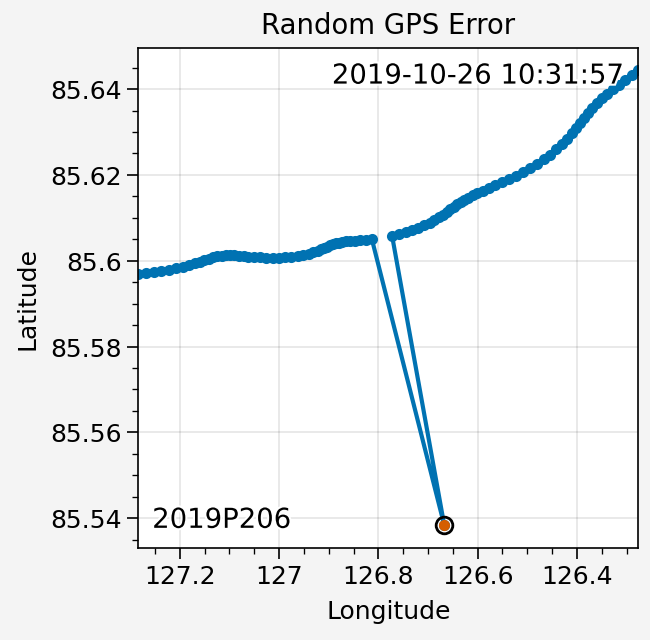

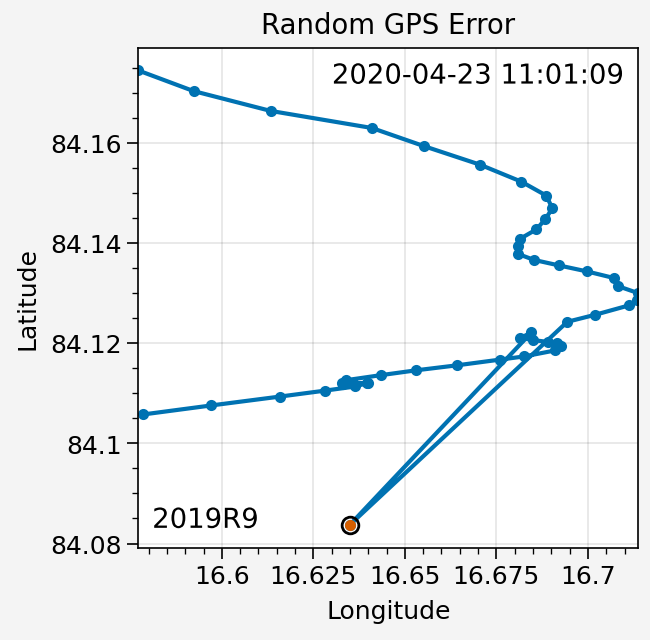

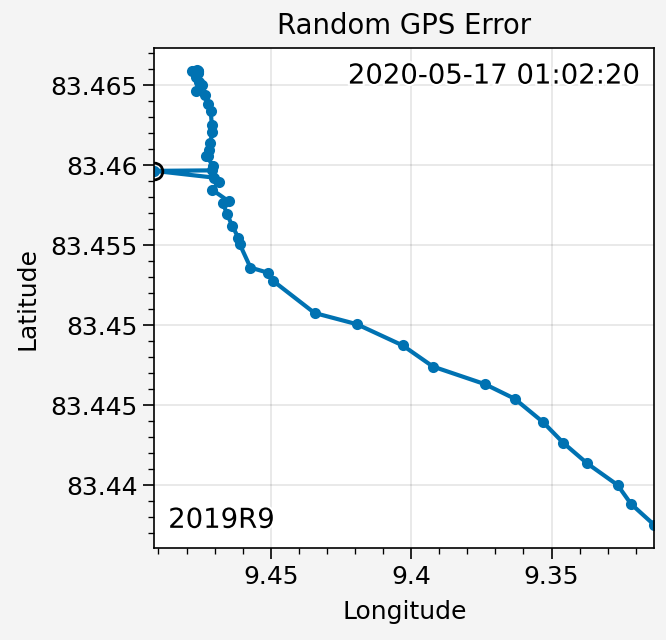

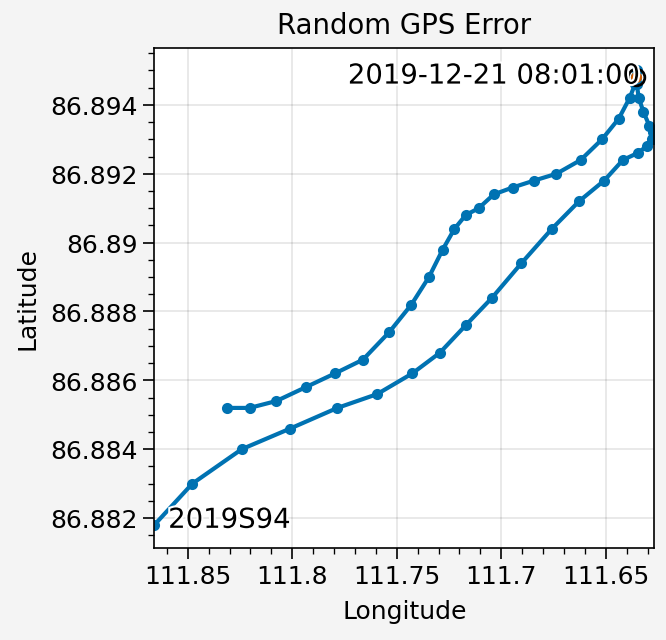

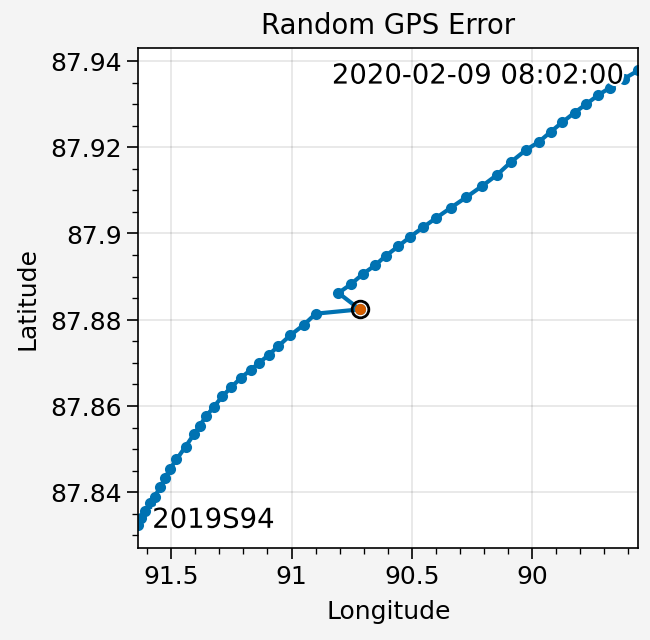

In [235]:
for buoy, date in zip(test_df.buoy_id, test_df.date):
    fig, ax = pplt.subplots()
    buoy_df = first_pass[buoy]
    dt = pd.to_timedelta('1D')
    timeslice = slice(date - dt, date + dt)
    ax.plot(buoy_df.loc[timeslice, 'longitude'], buoy_df.loc[timeslice, 'latitude'], marker='.')
    ax.plot(
        buoy_df.where(buoy_df.flag).loc[timeslice, 'longitude'],
        buoy_df.where(buoy_df.flag).loc[timeslice, 'latitude'], marker='.')
    ax.plot(buoy_df.loc[date, 'longitude'], buoy_df.loc[date, 'latitude'], marker='o', edgecolor='k', facecolor='none')
    ax.format(xlabel='Longitude', ylabel='Latitude',
              title='Random GPS Error', lltitle=buoy, urtitle=date)


In [237]:
for buoy, date, flag in zip(test_df.buoy_id, test_df.date, test_df.outlier):
    print(buoy, date, flag, first_pass[buoy].loc[date, 'flag'])

2019O3 2019-12-20 17:50:00 True True
2019P140 2019-10-30 15:30:00 True True
2019P142 2020-04-04 14:30:00 True False
2019P142 2020-05-25 01:00:00 True True
2019P142 2020-07-23 00:59:59 True False
2019P203 2020-04-12 17:00:39 True True
2020P171 2020-12-13 00:04:00 True False
2020P171 2021-01-08 20:04:01 True False
2020P171 2021-01-08 16:04:02 True False
2019P206 2019-10-26 10:31:57 True True
2019R9 2020-04-23 11:01:09 True True
2019R9 2020-05-17 01:02:20 True False
2019S94 2019-12-21 08:01:00 False True
2019S94 2020-02-09 08:02:00 True True


In [171]:
buoy = '2019P206'
date = pd.to_datetime('2019-10-26 12:00')
dt = pd.to_timedelta('2D')
timeslice = slice(date - dt, date + dt)



test_flag = cleaning.check_position_splines(first_pass[buoy].loc[timeslice].copy(),
                                xvar='longitude',
                                yvar='latitude',
                                df=31,
                                fit_window='48H',
                                sigma=6)
print(np.any(test_flag))

False


In [178]:
flagged

DatetimeIndex(['2019-10-26 10:31:57', '2020-08-28 17:00:35',
               '2020-08-28 17:30:25', '2020-08-28 18:00:24',
               '2020-08-28 18:30:25', '2020-08-28 19:00:25',
               '2020-08-28 19:30:53', '2020-08-28 20:00:38',
               '2020-08-28 20:30:25', '2020-08-28 21:00:24',
               '2020-08-28 21:30:25', '2020-08-28 22:00:28',
               '2020-08-28 22:30:53', '2020-08-29 02:00:54',
               '2020-08-29 02:30:25', '2020-08-29 03:00:24',
               '2020-08-29 03:30:27', '2020-08-29 04:00:36',
               '2020-08-29 04:30:24'],
              dtype='datetime64[ns]', name='datetime', freq=None)

In [ ]:
2019P203
2019P151
2019P119
2019O4
2019P143
2019P137
2019P190
2019P112
2020P220
2020O10

In [182]:
for buoy in first_pass:
    print(buoy, first_pass[buoy].flag.sum())

2019R9 1
2019P142 51
2019W4 0
2019T66 0
2020P164 0
2019R8 0
2020P170 1
2019P203 122
2019P91 5
2020P176 0
2019P151 472
2020P171 10
ASFS50UCB4 0
2020P162 1
2020P233 3
2019O4 160
2019P119 4058
2020S97 7
2019T67 0
2019P143 227
2019S87 0
2019P137 35
ASFS30UCB5 0
2020P163 0
2019O7 0
2019W2 0
2020T84 0
2020P178 0
ASFS30UCB4 0
2020P174 0
2020T81 0
2020P215 152
2020R10 0
2019P190 382
2019P112 3199
2019S94 4
2019O2 1
2019T70 12
2019P153 0
2020P230 761
2020P236 1
2019O3 3
2019P138 71
2019P126 0
2019P161 0
2020P220 5151
2020O10 217
2019I2 103
2020P214 235
2019P187 0
2019P140 124
2019P199 1
2019P146 105
2019O6 6
2020T74 0
2019P125 4945
2019T56 9
2020P177 8
2020R21 0
2019T68 0
2019P152 853
ASFS50UCB3 0
2020P223 0
2019P92 3
2020T85 0
2019V4 1
2020P228 1
2019P189 0
2020P172 1
2019F3 0
2019P90 549
2019P102 1286
2020P225 440
2019P139 13
2020T78 0
2019M30 0
2019P88 353
2019P105 2
2020E1 0
2020S108 9
2019P195 0
2020M23 0
2019V2 16
2019F1 0
2019S96 3
2020P180 30
2020P226 0
2019P192 30
2020P168 0
2020S109 0

In [ ]:
'2019O3', '2019-12-20 17:50:00', True
'2019P140', '2019-10-30 15:30:00', True
'2019S94', '2019-12-21 08:01:00', False (check this)
'2019S94', '2020-02-09 08:02:00', True
'2019P203', '2020-04-12 17:00:39', True

2020P230 has a large number flagged due to going south of 65
2019P190 many of the flags are when the buoy has washed up somewhere or gotten stuck
2019T70 flags are for gap segments

In [217]:
flagged

DatetimeIndex(['2020-10-26 13:34:42', '2020-10-27 06:00:34',
               '2020-10-27 08:00:38', '2020-10-27 08:30:36',
               '2020-10-27 09:30:38', '2020-10-27 10:00:33',
               '2020-10-27 10:30:40', '2020-10-27 14:00:46',
               '2020-10-27 16:30:47', '2020-10-27 17:30:39',
               ...
               '2020-12-12 12:00:55', '2020-12-12 12:30:27',
               '2020-12-12 13:00:28', '2020-12-12 13:30:29',
               '2020-12-12 23:00:38', '2020-12-12 23:30:28',
               '2020-12-13 00:00:32', '2020-12-13 00:30:27',
               '2020-12-13 01:00:28', '2020-12-13 01:30:29'],
              dtype='datetime64[ns]', name='datetime', length=382, freq=None)

In [233]:
buoy_df = first_pass[buoy].copy()
buoy_df['date_flag'] = cleaning.check_dates(first_pass[buoy])
buoy_df['position_flag'] = cleaning.check_positions(first_pass[buoy], pairs_only=True)
buoy_df['speed_flag'] = cleaning.check_speed(first_pass[buoy])
buoy_df['gap_flag'] = cleaning.check_gaps(first_pass[buoy], threshold_gap='6H', threshold_segment=24)
buoy_df.loc[buoy_df.flag & ~buoy_df.gap_flag]

,latitude,longitude,flag,date_flag,position_flag,speed_flag,gap_flag
datetime,,,,,,,
2020-10-01 23:00:01,70.8500,-20.2926,True,False,False,True,False
2020-10-08 03:59:59,67.9126,-25.3964,True,False,False,True,False
2020-10-08 05:00:01,67.8566,-25.4676,True,False,False,True,False
2020-10-08 06:00:00,67.8002,-25.5798,True,False,False,True,False
2020-10-08 06:59:59,67.7552,-25.7188,True,False,False,True,False
...,...,...,...,...,...,...,...
2020-11-11 09:59:59,64.0404,-39.8034,True,False,False,False,False
2020-11-11 11:00:01,64.0272,-39.8502,True,False,False,False,False
2020-11-11 12:00:00,64.0174,-39.8892,True,False,False,False,False


2019P151 472


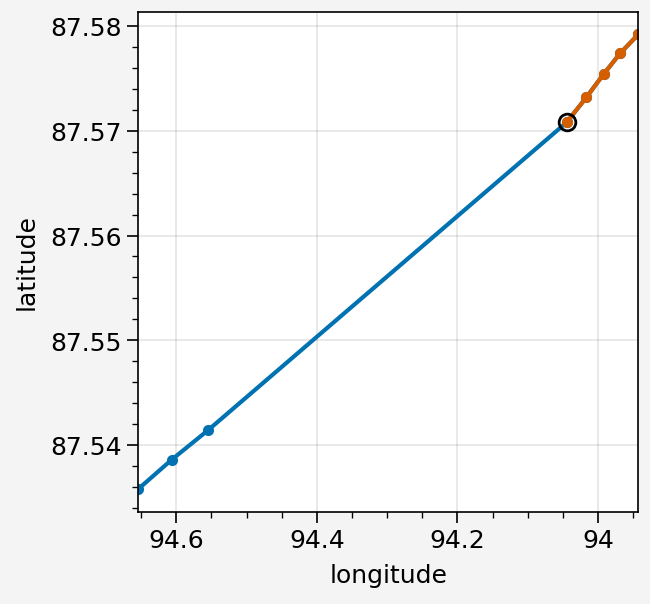

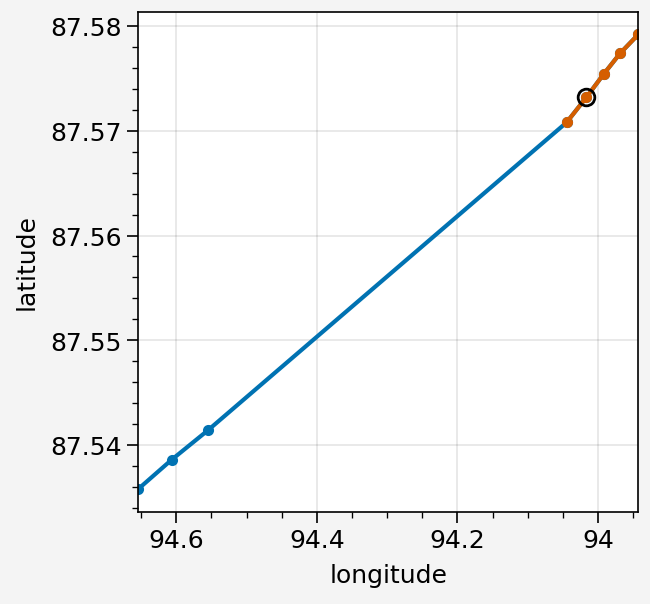

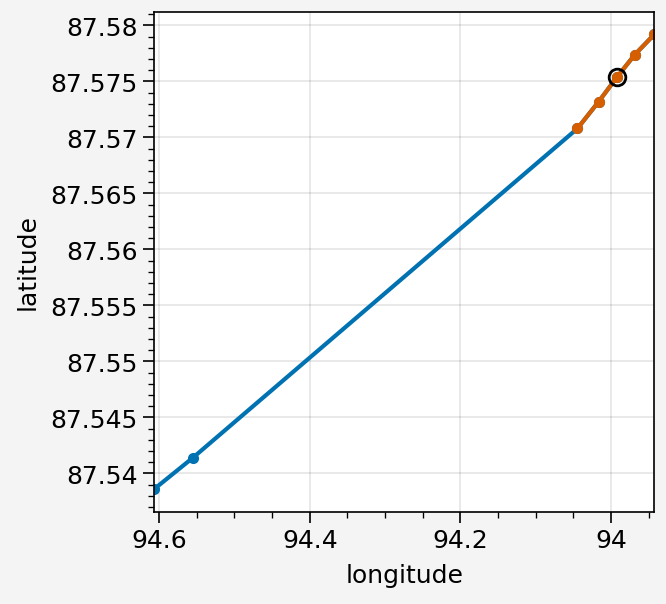

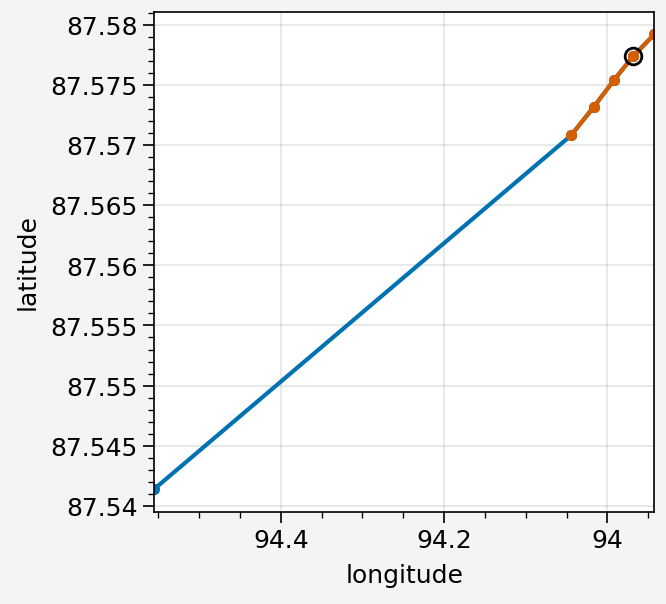

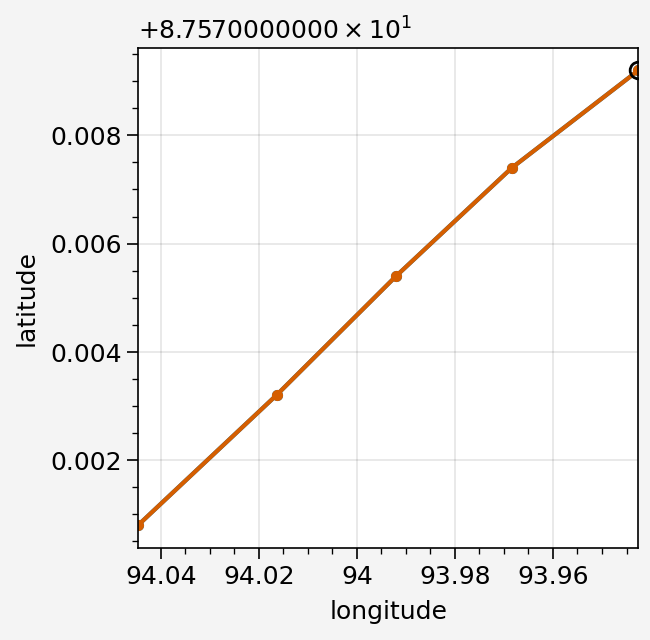

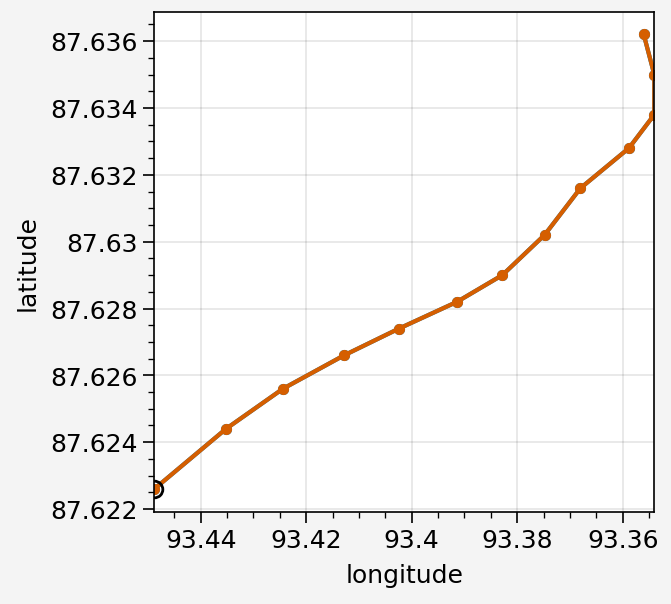

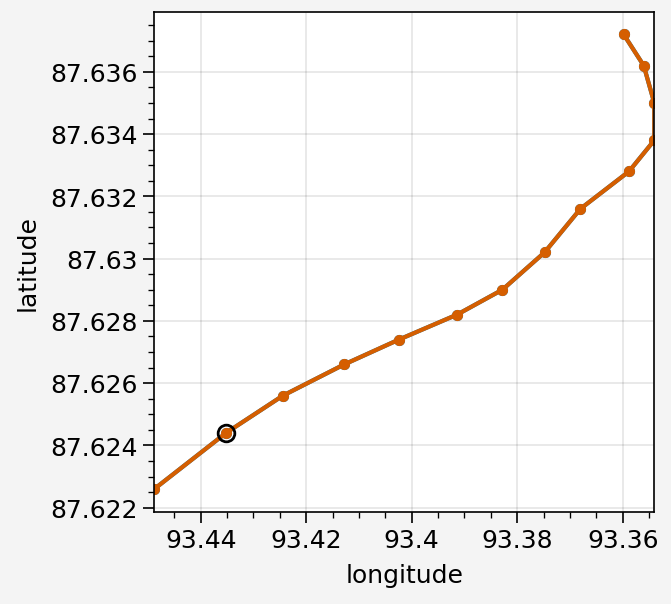

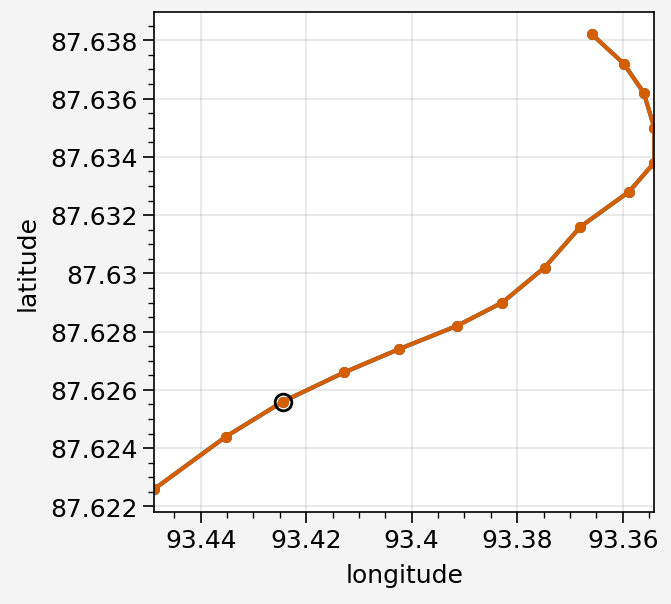

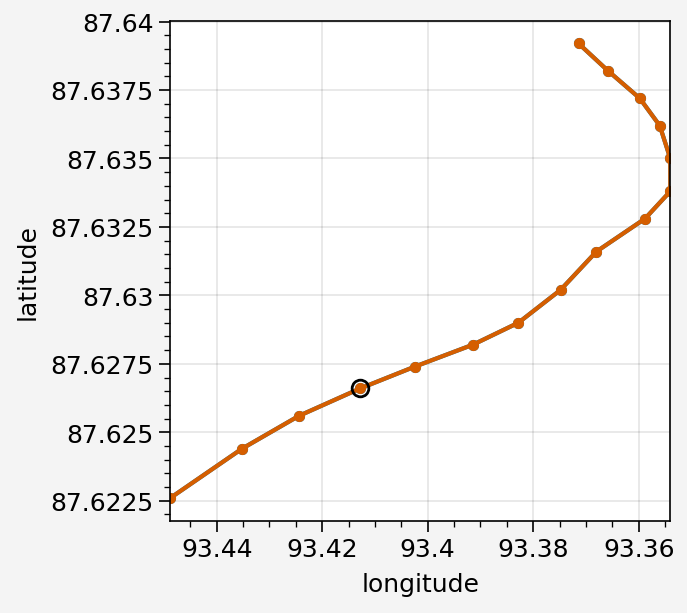

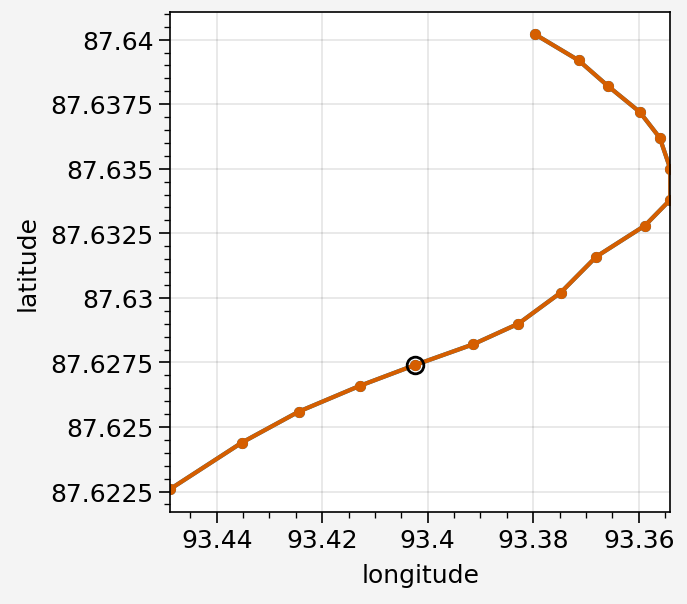

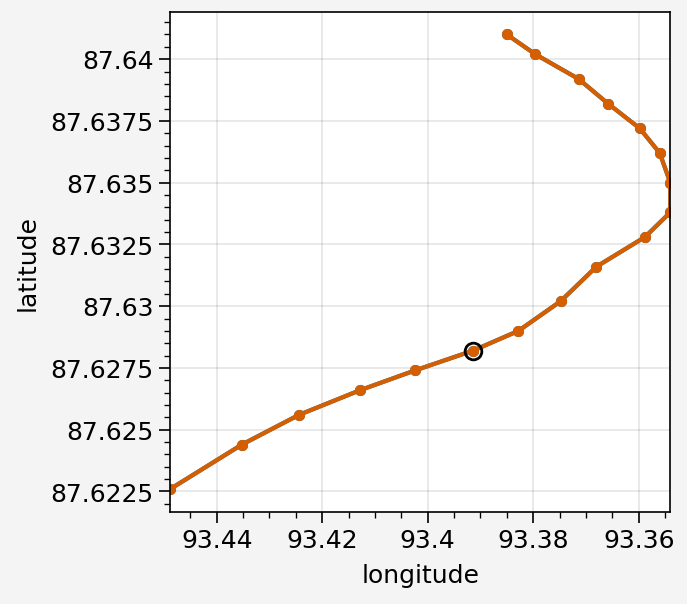

In [232]:
buoy = '2019P151'
flagged = first_pass[buoy].loc[first_pass[buoy]['flag']].index
print(buoy, len(flagged))
max_plots = 10
count = 0
for date in flagged[:]:
    fig,ax = pplt.subplots()
    buoy_df = first_pass[buoy].copy()
    dt = pd.to_timedelta('12H')
    timeslice = slice(date - dt, date + dt)
    ax.plot(buoy_df.loc[timeslice, 'longitude'], buoy_df.loc[timeslice, 'latitude'], marker='.')
    ax.plot(
        buoy_df.where(buoy_df.flag).loc[timeslice, 'longitude'],
        buoy_df.where(buoy_df.flag).loc[timeslice, 'latitude'], marker='.')
    ax.plot(buoy_df.loc[date, 'longitude'], buoy_df.loc[date, 'latitude'], marker='o', edgecolor='k', facecolor='none')
    count += 1
    if count > 10:
        break

In [225]:
# Note - maybe don't be so aggressive with the gap threshold - there's valuable information being tossed away
# Hard to say what's too big of a gap though 
flagged

DatetimeIndex(['2020-04-12 17:00:39', '2020-05-30 05:00:30',
               '2020-05-30 05:30:27', '2020-05-30 06:00:32',
               '2020-05-30 06:30:33', '2020-05-30 07:00:27',
               '2020-05-30 07:30:36', '2020-05-30 08:00:35',
               '2020-05-30 08:30:25', '2020-05-30 09:00:32',
               ...
               '2020-06-11 21:30:59', '2020-06-11 22:00:31',
               '2020-06-11 22:30:47', '2020-06-14 14:00:30',
               '2020-06-14 14:30:28', '2020-06-14 15:00:34',
               '2020-06-14 15:30:30', '2020-06-14 16:01:00',
               '2020-06-14 16:30:47', '2020-06-21 23:04:48'],
              dtype='datetime64[ns]', name='datetime', length=122, freq=None)

In [226]:
buoy_df = first_pass[buoy].copy()
buoy_df['date_flag'] = cleaning.check_dates(first_pass[buoy])
buoy_df['position_flag'] = cleaning.check_positions(first_pass[buoy], pairs_only=True)
buoy_df['speed_flag'] = cleaning.check_speed(first_pass[buoy])
buoy_df['gap_flag'] = cleaning.check_gaps(first_pass[buoy], threshold_gap='6H', threshold_segment=24)
buoy_df.loc[buoy_df.flag & ~buoy_df.gap_flag]

,latitude,longitude,flag,date_flag,position_flag,speed_flag,gap_flag
datetime,,,,,,,
2020-04-12 17:00:39,84.16047,12.68526,True,False,False,True,False


In [221]:
buoy_df.loc[slice('2020-08-07', '2020-08-12')]

,latitude,longitude,flag,date_flag,position_flag,speed_flag,gap_flag
datetime,,,,,,,
2020-08-07 01:00:15,79.74264,-5.03518,False,False,False,False,False
2020-08-07 03:00:13,79.74872,-5.02786,False,False,False,False,False
2020-08-07 13:54:21,79.76012,-4.96233,True,False,False,False,True
2020-08-07 14:05:12,79.76051,-4.96233,True,False,False,False,True
2020-08-07 16:00:20,79.77871,-4.78600,True,False,False,False,True
2020-08-07 18:00:18,79.87329,-4.11519,True,False,False,True,True
2020-08-07 20:00:19,79.92551,-3.60006,True,False,False,False,True
2020-08-07 22:00:15,79.91005,-3.56457,True,False,False,False,True
2020-08-08 00:00:13,79.90112,-3.55740,True,False,False,False,True
